In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import math
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.decomposition import PCA

In [54]:
df = pd.read_csv("order_clean_join_all.csv")
df.head()

/var/folders/nr/2_l0dxkj7vxfbxy3c016j3s00000gn/T/ipykernel_30068/1767332170.py:1: DtypeWarning: Columns (14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("order_clean_join_all.csv")


,akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,...,gender,dob,LOCATION_TYPE,latitude,longitude,latitude_vendor,longtitude_vendor,vendor_category_en,delivery_charge,vendor_tag_name
0,163238.0,92PEE24,1.0,7.6,2,0,0.0,0.0,No,No,...,Male,NaN,Other,-0.132100,-78.575297,-0.967769,0.080839,Restaurants,0.0,"American,Burgers,Free Delivery,Hot Dogs,Pasta"
1,163240.0,QS68UD8,1.0,8.7,1,0,0.0,0.0,No,No,...,Unknown,NaN,Work,-0.393396,-78.544417,-1.271979,0.028832,Restaurants,0.0,"Burgers,Desserts,Free Delivery,Grills,Mexican"
2,163241.0,MB7VY5F,2.0,14.4,1,0,0.0,0.0,No,No,...,Unknown,NaN,Other,-1.072823,-78.464121,-0.927944,0.145900,Restaurants,0.7,"Breakfast,Desserts,Salads,Arabic"
3,163244.0,KDJ951Y,1.0,7.1,1,0,0.0,0.0,No,No,...,Male,NaN,Home,-0.292713,-78.556316,-0.601096,0.095998,Restaurants,0.0,"American,Burgers,Desserts,Mojitos ,Pasta"
4,163245.0,BAL0RVT,4.0,27.2,1,0,0.0,0.0,No,No,...,Male,NaN,Work,-0.231810,-78.563513,-0.927944,0.145900,Restaurants,0.7,"Breakfast,Desserts,Salads,Arabic"


In [106]:
df['vendor_rating'].unique()

array([0., 5., 4., 2., 1., 3.])

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135216 entries, 0 to 135215
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   akeed_order_id                  135216 non-null  float64
 1   customer_id                     135216 non-null  object 
 2   item_count                      135216 non-null  float64
 3   grand_total                     135216 non-null  float64
 4   payment_mode                    135216 non-null  int64  
 5   promo_code                      135216 non-null  int64  
 6   vendor_discount_amount          135216 non-null  float64
 7   promo_code_discount_percentage  135216 non-null  float64
 8   is_favorite                     135216 non-null  object 
 9   is_rated                        135216 non-null  object 
 10  vendor_rating                   135216 non-null  float64
 11  driver_rating                   135216 non-null  float64
 12  deliverydistance

In [56]:
df[['order_accepted_time', 'ready_for_pickup_time', 'delivery_date', 'created_at']][df.any(axis = 1)].sample(n = 50)

,order_accepted_time,ready_for_pickup_time,delivery_date,created_at
75592,2019-12-03 17:34:17,NaN,NaN,2019-12-03 17:33:11
20063,NaN,NaN,2019-07-14 05:30:00,2019-07-15 03:53:33
9295,NaN,NaN,2019-09-02 05:30:00,2019-09-02 22:31:25
21423,NaN,NaN,2019-07-18 05:30:00,2019-07-19 04:06:14
120246,2020-02-10 23:14:42,2020-02-10 23:34:57,NaN,2020-02-10 23:02:01
130682,2020-02-24 12:51:19,2020-02-24 13:08:41,NaN,2020-02-24 12:50:15
99387,2020-01-12 23:55:31,2020-01-13 00:04:33,NaN,2020-01-12 23:54:39
128451,2020-02-20 22:38:51,2020-02-20 23:00:41,NaN,2020-02-20 22:38:32
32357,NaN,NaN,2019-06-22 00:00:00,2019-06-22 14:35:02
129746,2020-02-22 22:43:58,2020-02-22 23:03:36,NaN,2020-02-22 22:42:52


Based on the eye test, it can be seen that most of the cases have the same day or just a difference of 1 day discrepancy. So, in here for the RFM, I will use the created_at as their order date.

## Try the RFM Method

In [57]:
df['order_date'] = pd.to_datetime(df['created_at']).dt.date

In [58]:
df.head()

,akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,...,dob,LOCATION_TYPE,latitude,longitude,latitude_vendor,longtitude_vendor,vendor_category_en,delivery_charge,vendor_tag_name,order_date
0,163238.0,92PEE24,1.0,7.6,2,0,0.0,0.0,No,No,...,NaN,Other,-0.132100,-78.575297,-0.967769,0.080839,Restaurants,0.0,"American,Burgers,Free Delivery,Hot Dogs,Pasta",2019-08-01
1,163240.0,QS68UD8,1.0,8.7,1,0,0.0,0.0,No,No,...,NaN,Work,-0.393396,-78.544417,-1.271979,0.028832,Restaurants,0.0,"Burgers,Desserts,Free Delivery,Grills,Mexican",2019-08-01
2,163241.0,MB7VY5F,2.0,14.4,1,0,0.0,0.0,No,No,...,NaN,Other,-1.072823,-78.464121,-0.927944,0.145900,Restaurants,0.7,"Breakfast,Desserts,Salads,Arabic",2019-08-01
3,163244.0,KDJ951Y,1.0,7.1,1,0,0.0,0.0,No,No,...,NaN,Home,-0.292713,-78.556316,-0.601096,0.095998,Restaurants,0.0,"American,Burgers,Desserts,Mojitos ,Pasta",2019-08-01
4,163245.0,BAL0RVT,4.0,27.2,1,0,0.0,0.0,No,No,...,NaN,Work,-0.231810,-78.563513,-0.927944,0.145900,Restaurants,0.7,"Breakfast,Desserts,Salads,Arabic",2019-08-01


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135216 entries, 0 to 135215
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   akeed_order_id                  135216 non-null  float64
 1   customer_id                     135216 non-null  object 
 2   item_count                      135216 non-null  float64
 3   grand_total                     135216 non-null  float64
 4   payment_mode                    135216 non-null  int64  
 5   promo_code                      135216 non-null  int64  
 6   vendor_discount_amount          135216 non-null  float64
 7   promo_code_discount_percentage  135216 non-null  float64
 8   is_favorite                     135216 non-null  object 
 9   is_rated                        135216 non-null  object 
 10  vendor_rating                   135216 non-null  float64
 11  driver_rating                   135216 non-null  float64
 12  deliverydistance

In [60]:
max_date = df['order_date'].max()
snapshot_date = max_date + dt.timedelta(days = 1)
snapshot_date

datetime.date(2020, 3, 1)

In [61]:
rfm = df.groupby('customer_id').agg({
    'order_date': lambda x: (snapshot_date - x.max()).days,
    'akeed_order_id': 'count',
    'grand_total': sum
})
rfm.rename(columns = {'order_date': 'Recency', 'akeed_order_id': 'Frequency', 'grand_total': 'Monetary'}, inplace = True)
rfm

/var/folders/nr/2_l0dxkj7vxfbxy3c016j3s00000gn/T/ipykernel_30068/1399846866.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  rfm = df.groupby('customer_id').agg({


,Recency,Frequency,Monetary
customer_id,,,
000THBA,139,1,29.6
002510Y,270,1,13.6
005ECL6,44,2,48.7
0075AM7,7,1,25.8
009UFS1,80,4,29.6
...,...,...,...
ZZVGIVK,110,2,38.6
ZZVLIB5,14,12,504.4
ZZWKMGG,253,1,22.2


In [62]:
rfm.describe()

,Recency,Frequency,Monetary
count,27442.000000,27442.000000,27442.000000
mean,71.723490,4.927338,75.784280
std,72.220807,7.619244,141.219577
min,1.000000,1.000000,0.000000
25%,15.000000,1.000000,13.900000
50%,42.000000,2.000000,31.500000
75%,109.000000,5.000000,80.600000
max,274.000000,262.000000,3965.500000


Monetary = 0. Let's check this

In [63]:
rfm[rfm['Monetary'] == 0]

,Recency,Frequency,Monetary
customer_id,,,
098AGWK,192,1,0.0
09PW8ST,74,2,0.0
0DT7TCF,118,1,0.0
0H5X6WN,29,1,0.0
0HMKWHG,31,1,0.0
...,...,...,...
ZF5SBGM,33,1,0.0
ZOGKK6R,103,1,0.0
ZQ9ENCL,103,1,0.0


In [64]:
df[df['customer_id'] == '098AGWK']

,akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,...,dob,LOCATION_TYPE,latitude,longitude,latitude_vendor,longtitude_vendor,vendor_category_en,delivery_charge,vendor_tag_name,order_date
5750,175110.0,098AGWK,3.0,0.0,1,1,0.0,0.0,No,No,...,NaN,Other,-1.134433,-78.45684,2.215692,0.714018,Restaurants,0.7,NaN,2019-08-22


What's wierd is that the grand total = 0, but item_count = 3. There could be a misimpute value on the system. To avoid error or ambiguity, we would prefer to drop it.

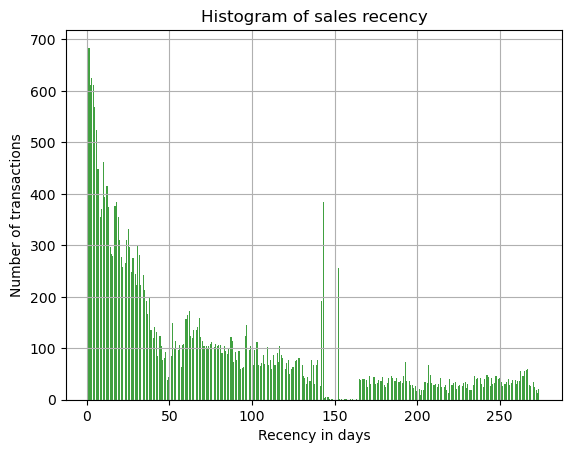

In [65]:
#Recency plot
x = rfm.Recency
mu = np.mean(rfm.Recency)
sigma = math.sqrt(np.var(rfm.Recency))
n, bins, patches = plt.hist(x, 400, facecolor='green', alpha=0.75)
plt.xlabel('Recency in days')
plt.ylabel('Number of transactions')
plt.title(r'Histogram of sales recency')
plt.grid(True)

In [66]:
rfm['Log_Monetary'] = np.where(rfm['Monetary'] == 0, 0, np.log(rfm['Monetary']))

rfm_cluster = rfm[['Recency', 'Frequency', "Log_Monetary"]]
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_cluster)

/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


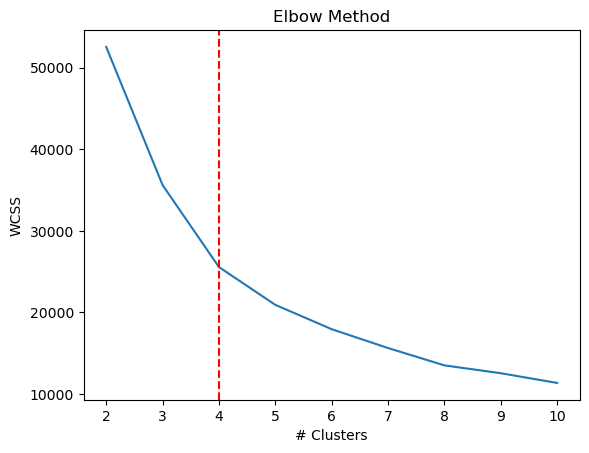

In [67]:
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, random_state=123)
    kmeans.fit_predict(rfm_scaled)
    wcss.append(kmeans.inertia_)

knee_locator = KneeLocator(range(2, 11), wcss, curve="convex", direction="decreasing")
optimal_k = knee_locator.knee

plt.plot(range(2, 11), wcss)
plt.axvline(optimal_k, color='r', linestyle='--', label=f"Optimal k = {optimal_k}")
plt.title("Elbow Method")
plt.xlabel("# Clusters")
plt.ylabel("WCSS")
plt.show();

Based on the elbow method, the best cluster is when k = 4.

In [68]:
kmeans = KMeans(n_clusters = 4, random_state = 123)
rfm['K-Means'] = kmeans.fit_predict(rfm_scaled)

In [69]:
rfm

,Recency,Frequency,Monetary,Log_Monetary,K-Means
customer_id,,,,,
000THBA,139,1,29.6,3.387774,1
002510Y,270,1,13.6,2.610070,1
005ECL6,44,2,48.7,3.885679,0
0075AM7,7,1,25.8,3.250374,3
009UFS1,80,4,29.6,3.387774,3
...,...,...,...,...,...
ZZVGIVK,110,2,38.6,3.653252,3
ZZVLIB5,14,12,504.4,6.223370,0
ZZWKMGG,253,1,22.2,3.100092,1


In [94]:
cluster_stats = rfm.groupby('K-Means').agg({'Recency': 'mean',
                                            'Frequency': 'mean',
                                            'Monetary': 'mean',
                                            'K-Means': 'count'}).rename(columns={'K-Means': 'Count'})
print("\nCluster Statistics:")
print(cluster_stats)


Cluster Statistics:
            Recency  Frequency    Monetary  Count
K-Means                                          
0         36.528957   7.125175  114.699248   9307
1        188.669540   1.781440   26.714790   5916
2         17.377711  30.243082  493.567091   1337
3         44.923543   1.647491   17.848043  10882


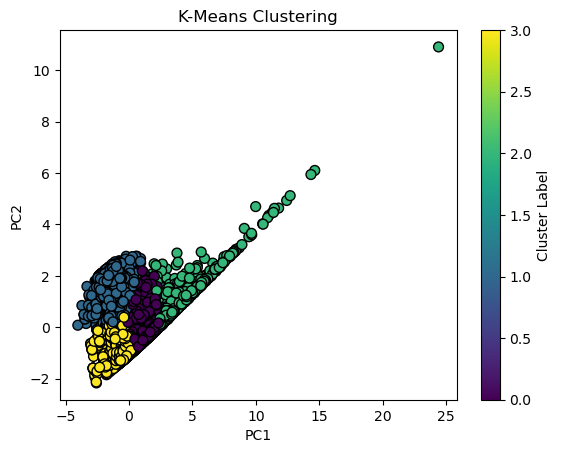

In [71]:
pca = PCA(n_components=2)
pca_df = pca.fit_transform(rfm_scaled)

plt.scatter(pca_df[:, 0], pca_df[:, 1], c=rfm['K-Means'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title("K-Means Clustering")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster Label')
plt.show()

In [72]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# hyperparameter
eps_values = np.arange(0.1, 5.1, 0.2)
min_samples_values = list(range(2, 10))

# to keep track of the best Silhouette score
best_score = -1  
best_eps = None
best_min_samples = None
best_model = None

# for loop for all combinations of the hyperarameters
for eps in eps_values:
    for min_samples in min_samples_values:
        # DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        y_pred = dbscan.fit_predict(rfm_scaled)

        # ignore the -1 because it is noise and check at least 2 clusters are exist
        # remove noise
        unique_labels = set(y_pred) - {-1}  
        # at least more than 1 cluster
        if len(unique_labels) > 1:  
            cluster_labels = y_pred[y_pred != -1]
            X_clustered = rfm_scaled[y_pred != -1]
            silhouette_avg = silhouette_score(X_clustered, cluster_labels)
        else:
            # if cluster = 1, silhouette score = -1
            silhouette_avg = -1  

        # update the best model
        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_eps = eps
            best_min_samples = min_samples
            best_model = dbscan

        print(f"eps={eps}, min_samples={min_samples}, Silhouette Score={silhouette_avg}")

print(f"Best eps: {best_eps}")
print(f"Best min_samples: {best_min_samples}")
print(f"Best Silhouette Score: {best_score}")

eps=0.1, min_samples=2, Silhouette Score=-0.44928992366697734


KeyboardInterrupt: 

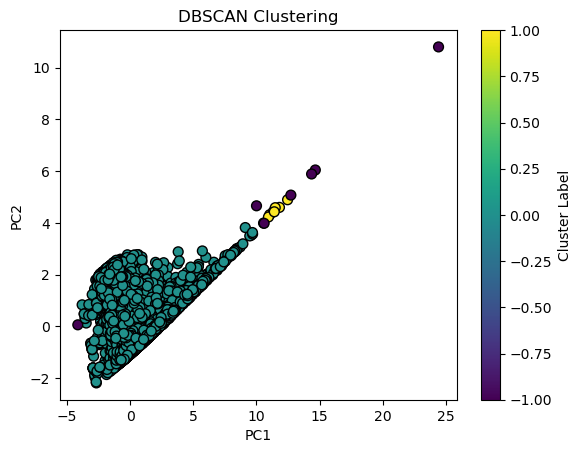

In [ ]:
pca = PCA(n_components=2)
pca_df = pca.fit_transform(rfm_scaled)

dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
y_pred = dbscan.fit_predict(rfm_scaled)

plt.scatter(pca_df[:, 0], pca_df[:, 1], c=y_pred, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title("DBSCAN Clustering")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster Label')
plt.show()

In [73]:
rfm

,Recency,Frequency,Monetary,Log_Monetary,K-Means
customer_id,,,,,
000THBA,139,1,29.6,3.387774,1
002510Y,270,1,13.6,2.610070,1
005ECL6,44,2,48.7,3.885679,0
0075AM7,7,1,25.8,3.250374,3
009UFS1,80,4,29.6,3.387774,3
...,...,...,...,...,...
ZZVGIVK,110,2,38.6,3.653252,3
ZZVLIB5,14,12,504.4,6.223370,0
ZZWKMGG,253,1,22.2,3.100092,1


In [74]:
cluster_stats

,Recency,Frequency,Monetary,Count
K-Means,,,,
0,36.528957,7.125175,114.699248,9307
1,188.669540,1.781440,26.714790,5916
2,17.377711,30.243082,493.567091,1337
3,44.923543,1.647491,17.848043,10882


Based on the cluster stats:
- Cluster 2: Super User -> most engage and the highest spender
- Cluster 0: Regular user -> cosistent spending on the app, but not as crazy as the second cluster
- Cluster 1: Lost User -> average recency is 188 days, which means they had disappear already
- Cluster 3: Churn User -> on average only use 1.7x, which means only trying the apps and that's it. Maybe they got discount on the app that's why trying on it, then it doesn't come back anymore.

In [81]:
cluster_mapping = {
    0: 'regular_user',
    1: 'churn_user',
    2: 'super_user',
    3: 'lost_user'
}
rfm["Segment"] = rfm["K-Means"].map(cluster_mapping)
rfm = rfm.reset_index()
rfm

,customer_id,Recency,Frequency,Monetary,Log_Monetary,K-Means,Segment
0,000THBA,139,1,29.6,3.387774,1,churn_user
1,002510Y,270,1,13.6,2.610070,1,churn_user
2,005ECL6,44,2,48.7,3.885679,0,regular_user
3,0075AM7,7,1,25.8,3.250374,3,lost_user
4,009UFS1,80,4,29.6,3.387774,3,lost_user
...,...,...,...,...,...,...,...
27437,ZZVGIVK,110,2,38.6,3.653252,3,lost_user
27438,ZZVLIB5,14,12,504.4,6.223370,0,regular_user
27439,ZZWKMGG,253,1,22.2,3.100092,1,churn_user
27440,ZZY3N0D,6,9,67.6,4.213608,0,regular_user


In [83]:
df_segment = pd.merge(df, rfm[['customer_id', 'Segment']], how='left', on = 'customer_id')
df_segment

,akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,...,LOCATION_TYPE,latitude,longitude,latitude_vendor,longtitude_vendor,vendor_category_en,delivery_charge,vendor_tag_name,order_date,Segment
0,163238.0,92PEE24,1.0,7.6,2,0,0.0,0.0,No,No,...,Other,-0.132100,-78.575297,-0.967769,0.080839,Restaurants,0.0,"American,Burgers,Free Delivery,Hot Dogs,Pasta",2019-08-01,churn_user
1,163240.0,QS68UD8,1.0,8.7,1,0,0.0,0.0,No,No,...,Work,-0.393396,-78.544417,-1.271979,0.028832,Restaurants,0.0,"Burgers,Desserts,Free Delivery,Grills,Mexican",2019-08-01,churn_user
2,163241.0,MB7VY5F,2.0,14.4,1,0,0.0,0.0,No,No,...,Other,-1.072823,-78.464121,-0.927944,0.145900,Restaurants,0.7,"Breakfast,Desserts,Salads,Arabic",2019-08-01,churn_user
3,163244.0,KDJ951Y,1.0,7.1,1,0,0.0,0.0,No,No,...,Home,-0.292713,-78.556316,-0.601096,0.095998,Restaurants,0.0,"American,Burgers,Desserts,Mojitos ,Pasta",2019-08-01,churn_user
4,163245.0,BAL0RVT,4.0,27.2,1,0,0.0,0.0,No,No,...,Work,-0.231810,-78.563513,-0.927944,0.145900,Restaurants,0.7,"Breakfast,Desserts,Salads,Arabic",2019-08-01,regular_user
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135211,415507.0,L6LFY6H,1.0,13.3,2,0,0.0,0.0,No,No,...,Other,-0.207822,0.473790,-0.181038,0.490518,Restaurants,0.0,"Breakfast,Desserts,Grills,Milkshakes,Salads,Sa...",2020-02-29,regular_user
135212,415508.0,2GMMVGI,3.0,9.5,1,0,0.0,0.0,No,Yes,...,Work,1.742466,0.377535,0.634654,0.527255,Restaurants,0.0,"Burgers,Desserts,Free Delivery,Pasta,Sandwiches",2020-02-29,regular_user
135213,415510.0,LYTAAV0,4.0,18.2,2,0,0.0,0.0,No,No,...,Other,0.688098,0.417760,0.480602,0.552850,Restaurants,0.7,Burgers,2020-02-29,regular_user
135214,415512.0,NEV9A5D,3.0,7.7,1,1,0.0,0.0,No,No,...,Other,-0.701674,0.724363,-0.496138,0.740214,Restaurants,0.0,"American,Breakfast,Burgers,Cafe,Desserts,Free ...",2020-02-29,lost_user


CLV -> customer lifetime value monthly basis
30 days CLV = Average Order value * purchas frequency per month

Average order value = Total revenue / total orders
Purchases frequency per month = average number of puchases a customer makes in 30 days

In [97]:
df_segment['order_date'] = pd.to_datetime(df_segment['order_date'], errors='coerce')
df_segment['year_month'] = df_segment['order_date'].dt.to_period('M')
monthly_orders = df_segment.groupby(['Segment', 'year_month'])['akeed_order_id'].count().reset_index()
monthly_users = df_segment.groupby(['Segment', 'year_month'])['customer_id'].nunique().reset_index()

monthly_orders = monthly_orders.merge(monthly_users, on=['Segment', 'year_month'], how='left')
monthly_orders['Avg_Orders_Per_User_Per_Month'] = monthly_orders['akeed_order_id'] / monthly_orders['customer_id']
avg_monthly_orders_per_segment = monthly_orders.groupby('Segment')['Avg_Orders_Per_User_Per_Month'].mean().reset_index()
avg_monthly_orders_per_segment.columns = ['Segment', 'Avg_Orders_Per_Month_Per_User']
avg_monthly_orders_per_segment

,Segment,Avg_Orders_Per_Month_Per_User
0,churn_user,1.304124
1,lost_user,1.159952
2,regular_user,1.938975
3,super_user,4.336164


In [98]:
cluster_stats_val = cluster_stats.reset_index()
cluster_stats_val["Segment"] = cluster_stats_val["K-Means"].map(cluster_mapping)
cluster_stats_val['avg_order_value'] = cluster_stats_val['Monetary']/cluster_stats_val['Frequency']
cluster_stats_val

,K-Means,Recency,Frequency,Monetary,Count,Segment,avg_order_value
0,0,36.528957,7.125175,114.699248,9307,regular_user,16.097746
1,1,188.669540,1.781440,26.714790,5916,churn_user,14.996176
2,2,17.377711,30.243082,493.567091,1337,super_user,16.320000
3,3,44.923543,1.647491,17.848043,10882,lost_user,10.833467


In [100]:
clv_df = pd.merge(avg_monthly_orders_per_segment, cluster_stats_val[['Segment', 'avg_order_value']], how='left', on = 'Segment')
clv_df

,Segment,Avg_Orders_Per_Month_Per_User,avg_order_value
0,churn_user,1.304124,14.996176
1,lost_user,1.159952,10.833467
2,regular_user,1.938975,16.097746
3,super_user,4.336164,16.320000


In [102]:
clv_df['CLV_30'] = clv_df['Avg_Orders_Per_Month_Per_User'] * clv_df['avg_order_value']
clv_df

,Segment,Avg_Orders_Per_Month_Per_User,avg_order_value,CLV_30
0,churn_user,1.304124,14.996176,19.556869
1,lost_user,1.159952,10.833467,12.566307
2,regular_user,1.938975,16.097746,31.213122
3,super_user,4.336164,16.320000,70.766199
